In [27]:
%load_ext autoreload
%autoreload 2

# Unfortunately this notebook will not run in binder

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Unfortunately-this-notebook-will-not-run-in-binder" data-toc-modified-id="Unfortunately-this-notebook-will-not-run-in-binder-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unfortunately this notebook will not run in binder</a></span></li><li><span><a href="#Calibration" data-toc-modified-id="Calibration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calibration</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Version-info" data-toc-modified-id="Version-info-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Version info</a></span></li></ul></li><li><span><a href="#Load-and-examine-the-data" data-toc-modified-id="Load-and-examine-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load and examine the data</a></span><ul class="toc-item"><li><span><a href="#Vacuum-probe" data-toc-modified-id="Vacuum-probe-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Vacuum probe</a></span></li><li><span><a href="#Calibration-dataset-(Poly-Au)" data-toc-modified-id="Calibration-dataset-(Poly-Au)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Calibration dataset (Poly Au)</a></span><ul class="toc-item"><li><span><a href="#Diffraction-shift-correction" data-toc-modified-id="Diffraction-shift-correction-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Diffraction shift correction</a></span></li><li><span><a href="#Elliptical-distortion-correction" data-toc-modified-id="Elliptical-distortion-correction-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>Elliptical distortion correction</a></span></li><li><span><a href="#Pixel-size-calibration" data-toc-modified-id="Pixel-size-calibration-2.1.2.3"><span class="toc-item-num">2.1.2.3&nbsp;&nbsp;</span>Pixel size calibration</a></span></li></ul></li><li><span><a href="#Save-calibration-measurements" data-toc-modified-id="Save-calibration-measurements-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Save calibration measurements</a></span></li><li><span><a href="#Apply-calibrations" data-toc-modified-id="Apply-calibrations-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Apply calibrations</a></span><ul class="toc-item"><li><span><a href="#Diffraction-shift-correction" data-toc-modified-id="Diffraction-shift-correction-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Diffraction shift correction</a></span></li><li><span><a href="#Elliptical-distortion-correction" data-toc-modified-id="Elliptical-distortion-correction-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>Elliptical distortion correction</a></span></li><li><span><a href="#Pixel-size-calibration" data-toc-modified-id="Pixel-size-calibration-2.1.4.3"><span class="toc-item-num">2.1.4.3&nbsp;&nbsp;</span>Pixel size calibration</a></span></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Save</a></span></li><li><span><a href="#Rotational-calibration" data-toc-modified-id="Rotational-calibration-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Rotational calibration</a></span><ul class="toc-item"><li><span><a href="#Save" data-toc-modified-id="Save-2.1.6.1"><span class="toc-item-num">2.1.6.1&nbsp;&nbsp;</span>Save</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Calibration
---

This notebook demonstates calibration of a 4DSTEM dataset of a crystalline sample.  It includes the following calibrations:

- center position (i.e. the optic axis / origin of coordinates in diffraction space, which may vary with scan position)
- elliptical distortions (i.e. the stretch/compression of diffraction space coordinates)
- rotational offset (i.e. the orientational misalignment of real and diffraction space directions)
- detector pixel size (i.e. the length of a diffraction space pixel)
- convergence angle (i.e. the size of the probe-forming aperture)

Good calibration is the heart of any quantitative measurement.  It will look different in different datasets and for different measurements and analyses.  Before calibrating a dataset, ask: what measurements are being performed, and what calibrations are required?

The calibration workflow here is meant as a guide, and is neither perfect nor completely general.  It is imperfect: for instance, only the lowest order elliptical distortions are measured and corrected here, while higher order distortions are ignored.  It is not general: this workflow is designed to achieve high accuracy, high precision strain maps, including computing the absolute real space length scale of the local lattice, and including orienting the strain matrix components both relative to the crystal lattice and relative to the real space images; it is designed to do this when an additional 4D-STEM scan of a standard calibration sample has been acquired the same day as the experimental scans.  It is not designed, for instance, for amorphous signal analysis, for cases where a separate calibration scan was not acquired, or for any number of other types of analysis. Acquiring data from a separate calibration sample is not always necessary, as data can often be calibrated from the sample itself - and microscope time is precious, and swapping samples time consuming - even so, acquiring a separate scan of some standardized sample (e.g. Au nanocrystals, used here) with every experiment will ensure good calibration is possible!

Here we focus on calibration for crystalline data, where the intended output is fully calibrated Bragg disk positions -- see also TKTKpolarellipticaltransform.ipynb for a case in which diffraction shift and elliptical distortion calibrations are applied somewhat differently.

### Data
This is simulated 4D-STEM data.  Simulations were performed by Colin Ophus.  The data has DOI number 10.5281/zenodo.3592520.

To download the data, please go either [here](https://drive.google.com/file/d/1-w5v89phuT5_0MEaKe5cHx6IvmcbonE1/view?usp=sharing) or [here](https://zenodo.org/record/3592520#.X3YkDWpKjOR).  Assuming you're running the notebook on your local computer, you should then need to place the file somewhere on your filesystem, and in the cell immediately after this one, update the variable `filepath` to reflect that path to the file, then update `filepath` to set where you'll save the outputs.

The data contained in this file is:

- a 4D dataset containing the measurements of interest; in this case, simulated data of a strained single crystalline Au nanoplatelet
- a 4D calibration dataset; in this case, polycrystalline Au nanoparticles
- a 3D stack of images of the electron probe over vacuum
- a 2D image of the electron probe over the sample and defocused until a shadow image is visible in the CBED pattern

The purpose of these datasets is as follows:

- 4D calibration dataset: used for the most accurate measurement of elliptical calibrations, and for absolute calibration of the detector pixel size using a known reference sample. Depending on the data, one or both of these may be calculable from the experimental 4D-STEM data itself, rather than from a separate calibration scan.
- 3D stack of vacuum probe images: used to calculate a vacuum probe which is used in template matching / disk detection. This can also be calculated various other ways - for more see TKTKprobe_template_gerp.
- 2D CBED shadow image: used for rotational calibration, in combinration with the 4D data of interest.  Necessary for strain mapping, and for orientation mapping.

### Version info

Last updated on 2020-10-02 with py4DSTEM version 0.11.2.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM
from os import path 
from file_getter import download_file_from_google_drive

In [2]:
filepath = "data/calibrationData_simulatedAuNanoplatelet.h5"

if path.exists(filepath):
    datacube = py4DSTEM.io.read(filepath) 
    print('File Loaded')
else:
    print('Downloading File')
    download_file_from_google_drive(id_='1-w5v89phuT5_0MEaKe5cHx6IvmcbonE1',
                               destination=f'{filepath}')
    datacube = py4DSTEM.io.read(filepath)  
    print('File Loaded')

Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       DataCube          (100, 84, 250, 250)     polyAu_4DSTEM                                         
  1       DataCube          (100, 84, 250, 250)     simulation_4DSTEM                                     
  2       DiffractionSlice  (512, 512)              defocused_probe                                       
  3       DiffractionSlice  (250, 250, 20)          probe_template                                        
File Loaded


## Load and examine the data

In [3]:
py4DSTEM.io.read(filepath)

Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       DataCube          (100, 84, 250, 250)     polyAu_4DSTEM                                         
  1       DataCube          (100, 84, 250, 250)     simulation_4DSTEM                                     
  2       DiffractionSlice  (512, 512)              defocused_probe                                       
  3       DiffractionSlice  (250, 250, 20)          probe_template                                        


In [4]:
datacube_sim = py4DSTEM.io.read(filepath,data_id='simulation_4DSTEM')
datacube_cal = py4DSTEM.io.read(filepath,data_id='polyAu_4DSTEM')
defocused_probe = py4DSTEM.io.read(filepath,data_id='defocused_probe')
probe_template = py4DSTEM.io.read(filepath,data_id='probe_template')
defocused_probe = defocused_probe.data
probe_template = probe_template.data

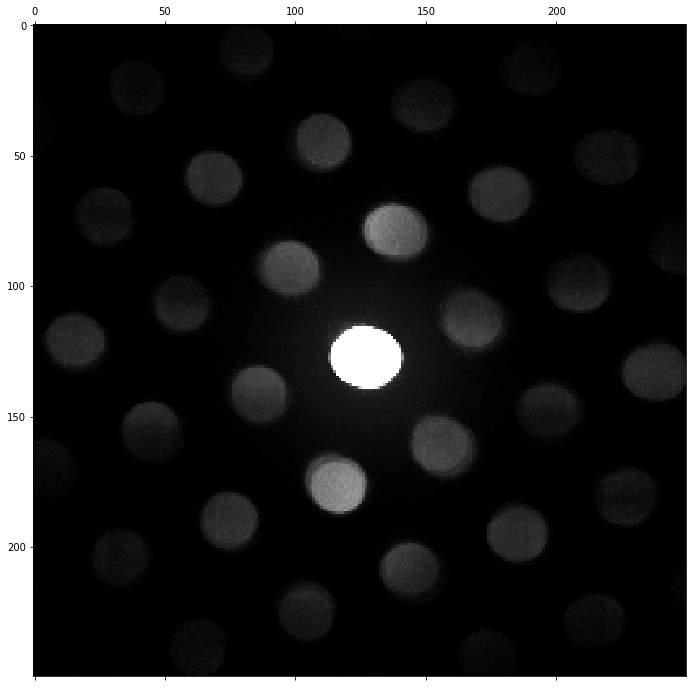

In [5]:
# Examine the 4D dataset of interest
dp_max_sim = np.max(datacube_sim.data,axis=(0,1))
py4DSTEM.visualize.show(dp_max_sim)

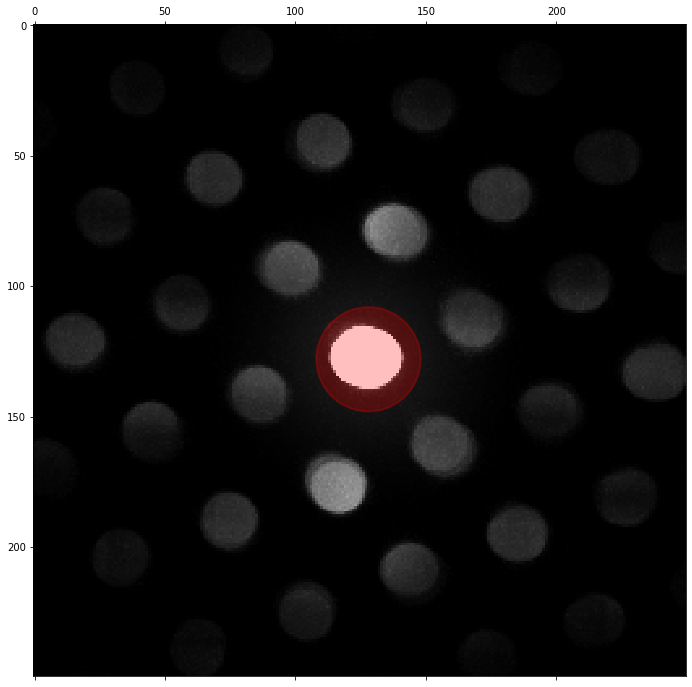

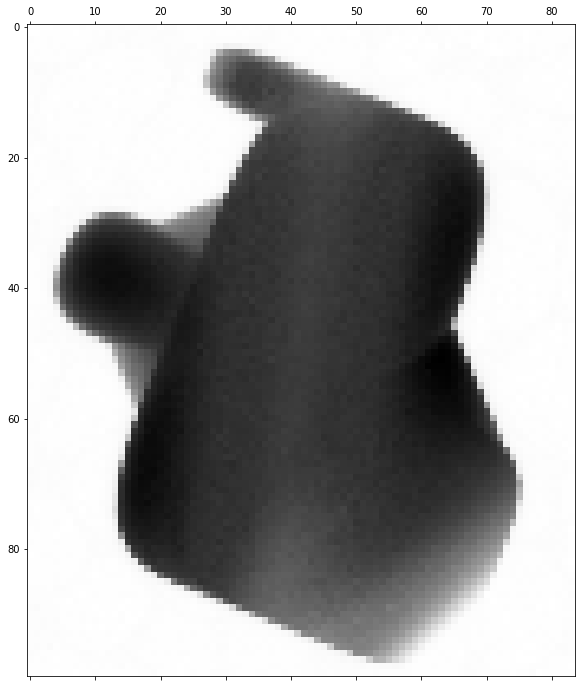

In [8]:
# Bright-field image
qx0,qy0 = 128,128
qR = 20

py4DSTEM.visualize.show_circ(dp_max_sim,center=(qx0,qy0),R=qR,alpha=0.25)
BF_sim = py4DSTEM.process.virtualimage.get_virtualimage_circ(datacube_sim,qx0,qy0,qR)
py4DSTEM.visualize.show(BF_sim,contrast='minmax')

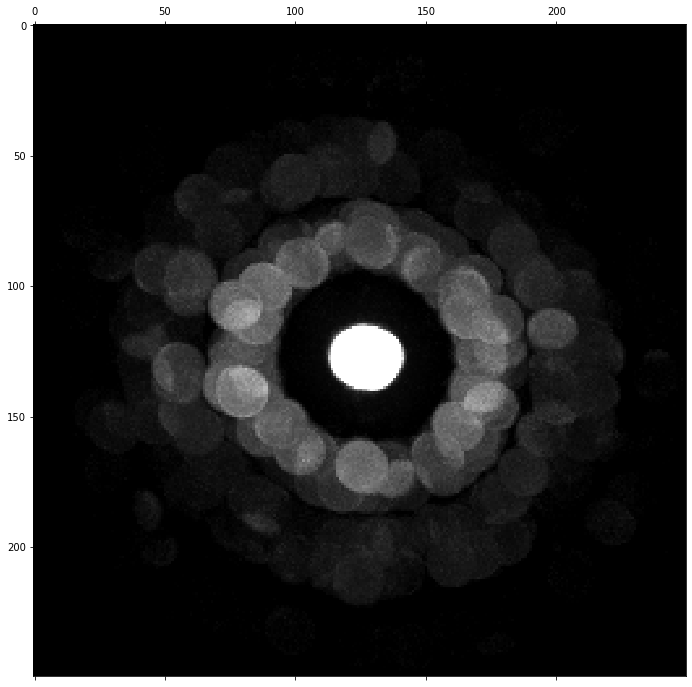

In [9]:
# Examine the 4D calibration dataset
dp_max_cal = np.max(datacube_cal.data,axis=(0,1))
py4DSTEM.visualize.show(dp_max_cal)

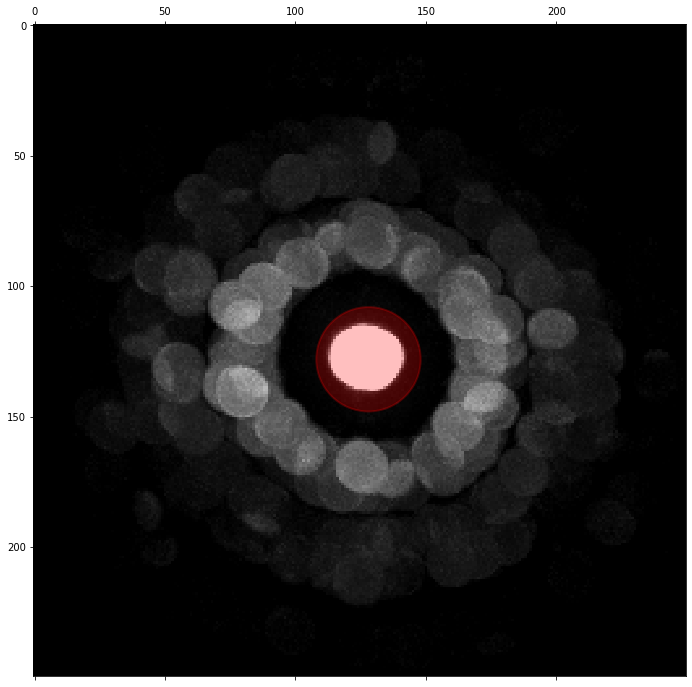

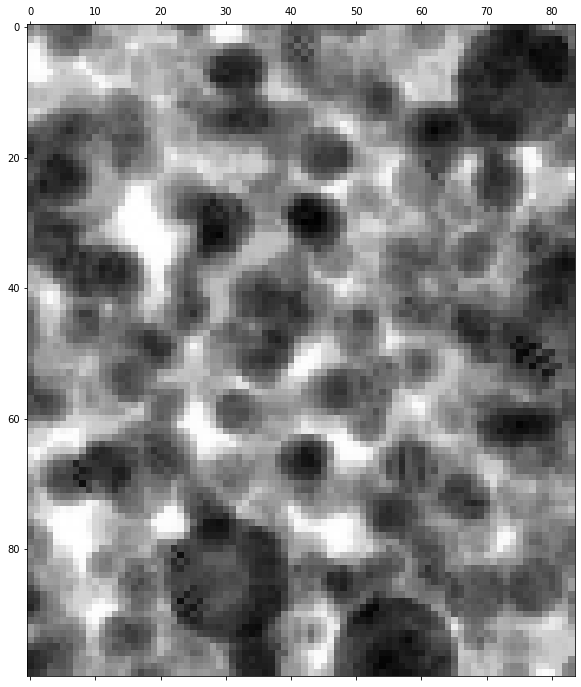

In [10]:
# Bright-field image
qx0,qy0 = 128,128
qR = 20

py4DSTEM.visualize.show_circ(dp_max_cal,center=(qx0,qy0),R=qR,alpha=0.25)
BF_cal = py4DSTEM.process.virtualimage.get_virtualimage_circ(datacube_cal,qx0,qy0,qR)
py4DSTEM.visualize.show(BF_cal,contrast='minmax')

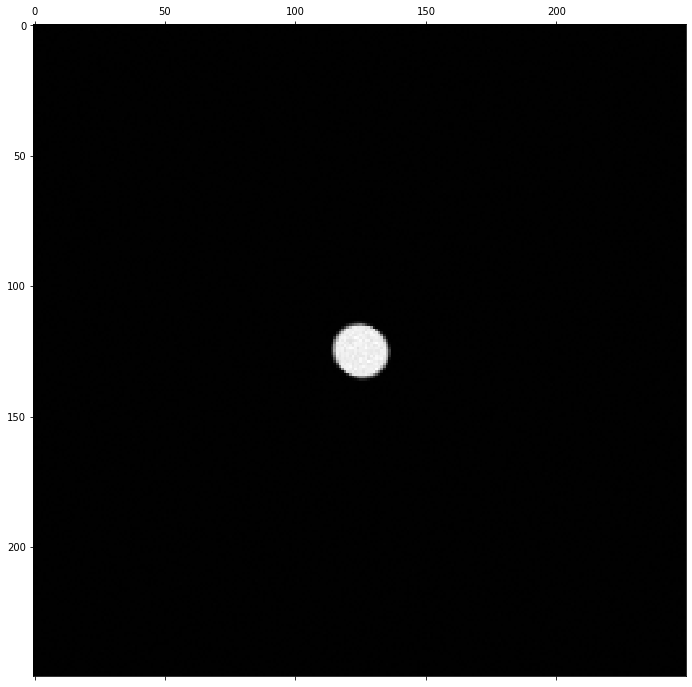

In [11]:
# Examine the 3D vacuum probe stack
py4DSTEM.visualize.show(probe_template[:,:,10],contrast='minmax')

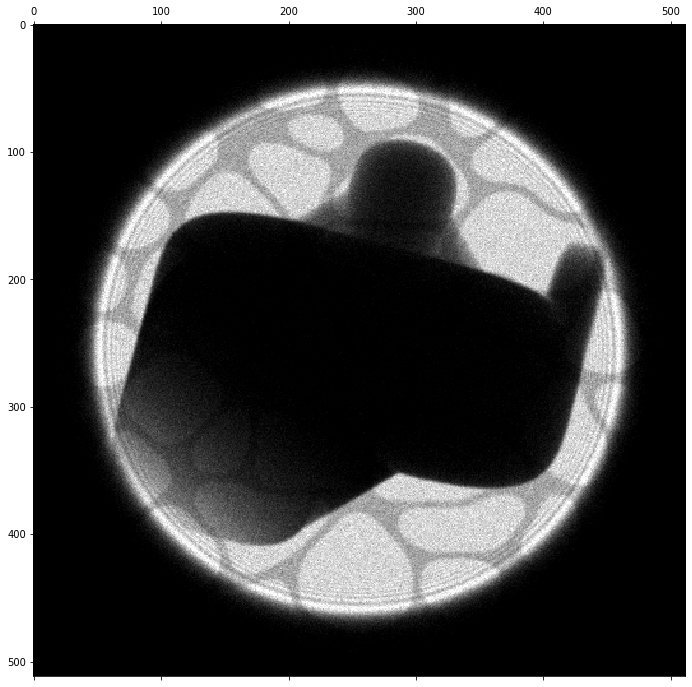

In [12]:
# Examine the 2D CBED shadow image
py4DSTEM.visualize.show(defocused_probe)

### Vacuum probe

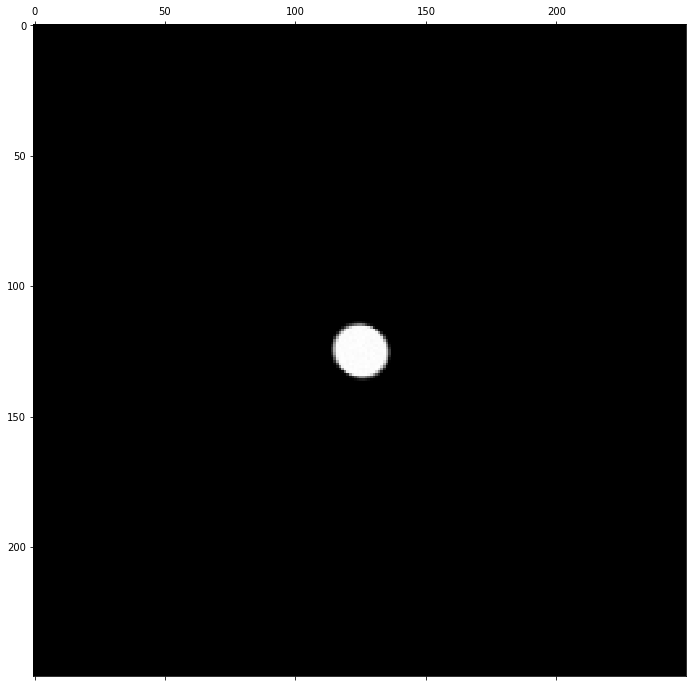

In [13]:
# Get the vacuum probe
probe = np.sum(probe_template,axis=2)
py4DSTEM.visualize.show(probe,contrast='minmax')

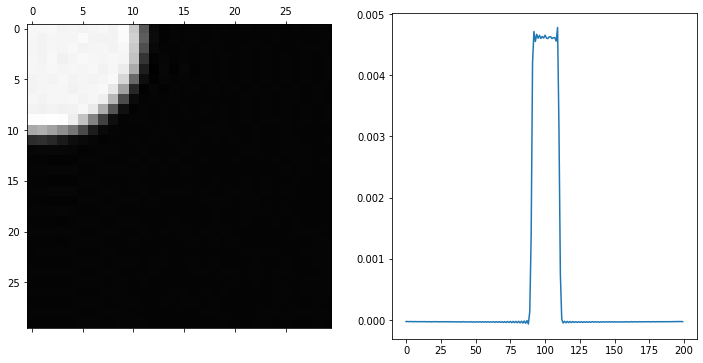

In [14]:
# Get the probe kernel
probe_kernel = py4DSTEM.process.diskdetection.get_probe_kernel_subtrgaussian(probe,sigma_probe_scale=2.5)
py4DSTEM.visualize.show_kernel(probe_kernel,R=30,L=100,W=3)

### Calibration dataset (Poly Au)

The calibration dataset will be used for two things:
1) determining the elliptical distortions, and
2) determining the detector (i.e. diffraction space) pixels size

Note that this is performed in a somewhat computationally expensive way here -- first finding all the bragg disks, then computing and correcting the diffraction shifts, are performed just to achieve the two calibrations noted above.  Less expensive approaches may also be possible.

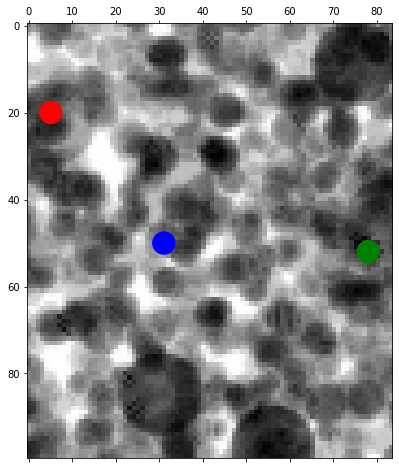

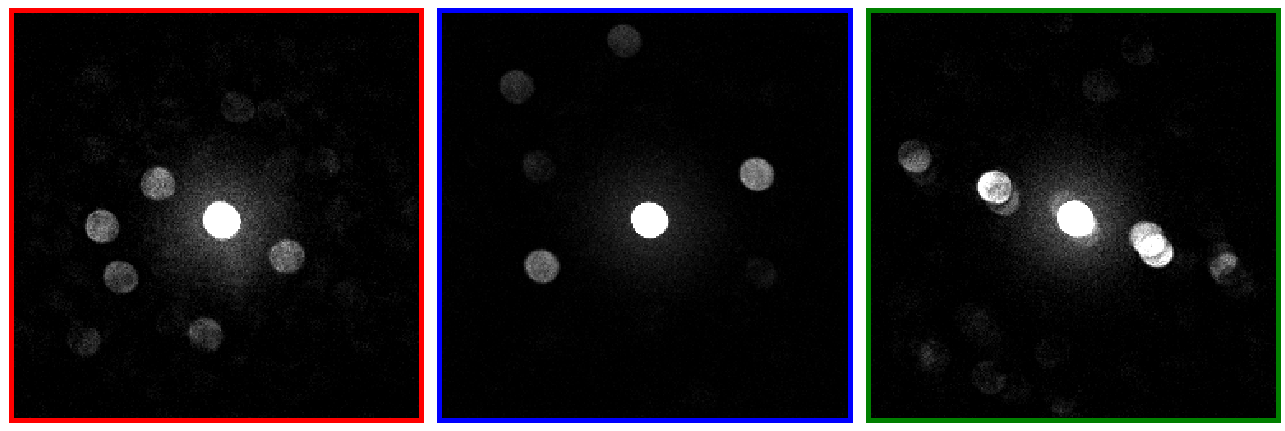

In [15]:
# Select a few DPs on which to test disk detection parameters

rxs_cal = 20,50,52
rys_cal = 5,31,78
colors = 'r','b','g'

py4DSTEM.visualize.show_points(BF_cal,x=rxs_cal,y=rys_cal,point_color=colors,contrast='minmax',figsize=(8,8))
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:datacube_cal.data[rxs_cal[i],rys_cal[i],:,:],
                                   H=1,W=3,get_bc=lambda i:colors[i])

Analyzed 3 diffraction patterns in 0h 0m 0s


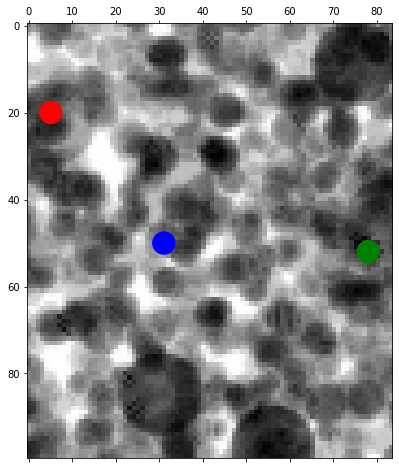

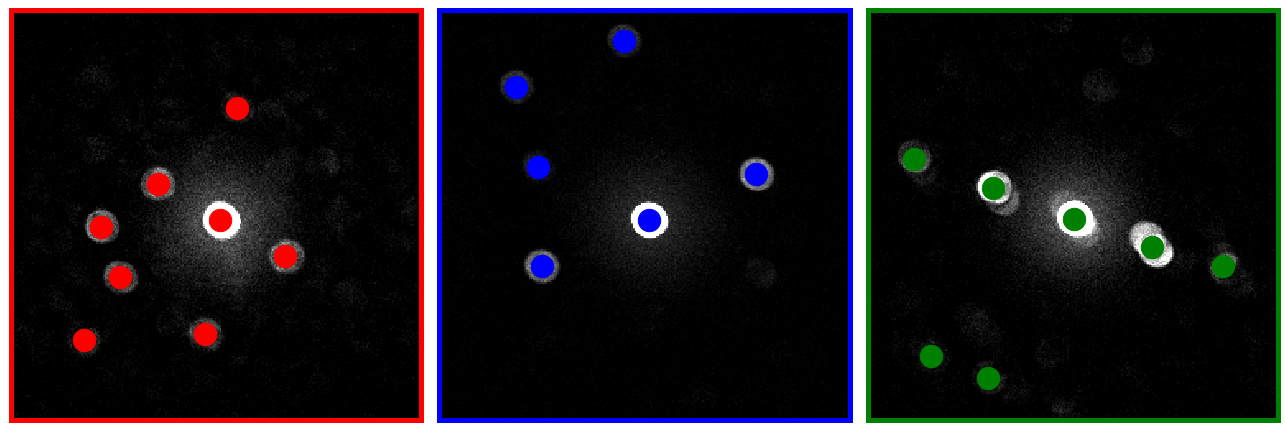

In [16]:
# Tune disk detection parameters on selected DPs

corrPower=1
sigma=2
edgeBoundary=10
minRelativeIntensity=0.0005
relativeToPeak=0
minPeakSpacing=20
maxNumPeaks=80
subpixel='multicorr'
upsample_factor=16

selected_peaks = py4DSTEM.process.diskdetection.find_Bragg_disks_selected(
                        datacube=datacube_cal,
                        probe=probe_kernel,
                        Rx=rxs_cal,
                        Ry=rys_cal,
                        corrPower=corrPower,
                        sigma=sigma,
                        edgeBoundary=edgeBoundary,
                        minRelativeIntensity=minRelativeIntensity,
                        relativeToPeak=relativeToPeak,
                        minPeakSpacing=minPeakSpacing,
                        maxNumPeaks=maxNumPeaks,
                        subpixel=subpixel,
                        upsample_factor=upsample_factor
)

py4DSTEM.visualize.show_points(BF_cal,x=rxs_cal,y=rys_cal,point_color=colors,contrast='minmax',figsize=(8,8))
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:datacube_cal.data[rxs_cal[i],rys_cal[i],:,:],
                                   H=1,W=3,get_bc=lambda i:colors[i],
                                   get_x=lambda i:selected_peaks[i].data['qx'],
                                   get_y=lambda i:selected_peaks[i].data['qy'],
                                   get_pointcolors=lambda i:colors[i])

In [17]:
# Get all disks

braggpeaks_cal_raw = py4DSTEM.process.diskdetection.find_Bragg_disks(
                                datacube=datacube_cal,
                                probe=probe_kernel,
                                corrPower=corrPower,
                                sigma=sigma,
                                edgeBoundary=edgeBoundary,
                                minRelativeIntensity=minRelativeIntensity,
                                relativeToPeak=relativeToPeak,
                                minPeakSpacing=minPeakSpacing,
                                maxNumPeaks=maxNumPeaks,
                                subpixel=subpixel,
                                upsample_factor=upsample_factor
)

Finding Bragg Disks: 100%|████████████████████████████████████████████████████████| 8.40k/8.40k [02:35<00:00, 54.0DP/s]

Analyzed 8400 diffraction patterns in 0h 2m 35s


100%|████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:02<00:00, 3162.14it/s]


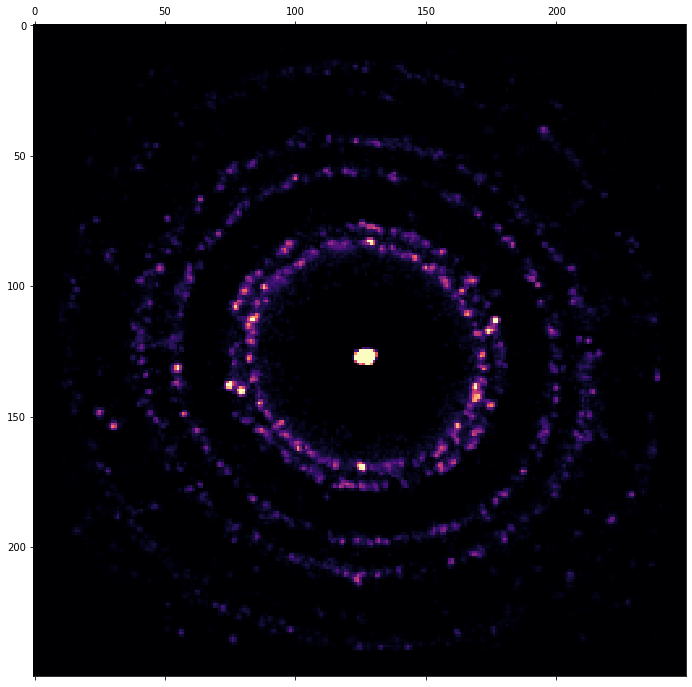

In [19]:
# Get Bragg vector map

bvm_cal = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                    braggpeaks_cal_raw,datacube_cal.Q_Nx,datacube_cal.Q_Ny)
py4DSTEM.visualize.show(bvm_cal,0,5,cmap='magma',power=0.5)

100%|████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:02<00:00, 3276.75it/s]


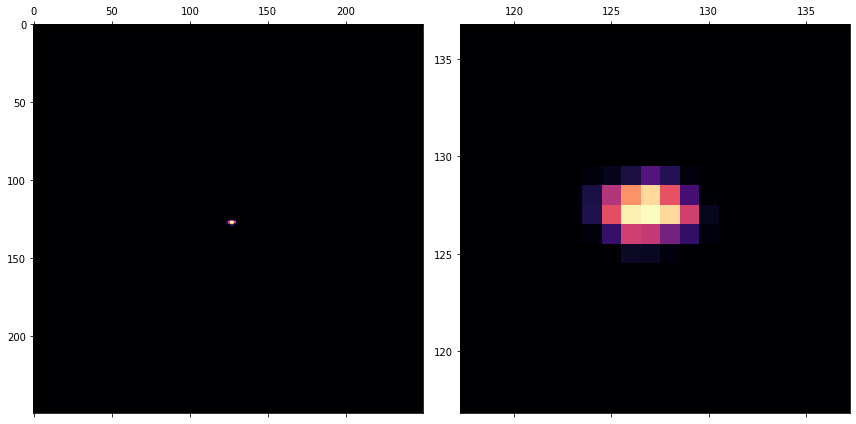

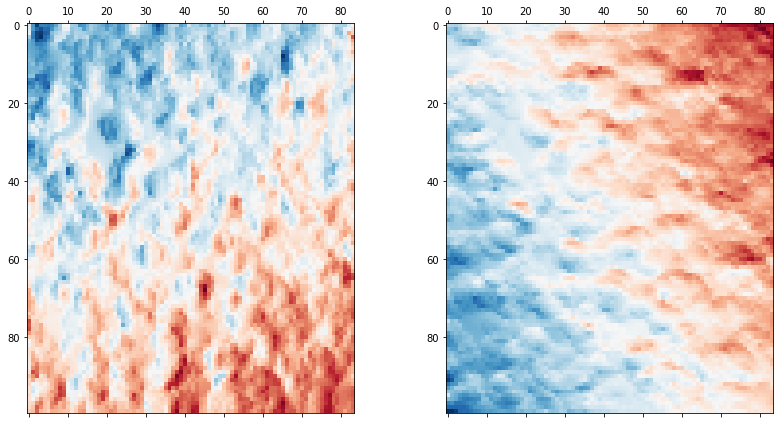

In [190]:
# Get center position

findcenter = 'CoM'   # Must be 'CoM' or 'max'
zoomin_rad = 10

xshifts_cal_meas, yshifts_cal_meas, bvm_center = py4DSTEM.process.calibration.get_diffraction_shifts(
            braggpeaks_cal_raw,datacube_cal.Q_Nx,datacube_cal.Q_Ny,findcenter=findcenter)

# Show
qx0,qy0 = py4DSTEM.process.utils.get_CoM(bvm_center)
fig,axs=py4DSTEM.visualize.show_image_grid(get_ar=lambda i:bvm_center,H=1,W=2,returnfig=True,cmap='magma',contrast='minmax')
axs[0,1].set_xlim(qx0-zoomin_rad,qx0+zoomin_rad)
axs[0,1].set_ylim(qy0-zoomin_rad,qy0+zoomin_rad)
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:[xshifts_cal_meas,yshifts_cal_meas][i],H=1,W=2,cmap='RdBu',contrast='minmax')

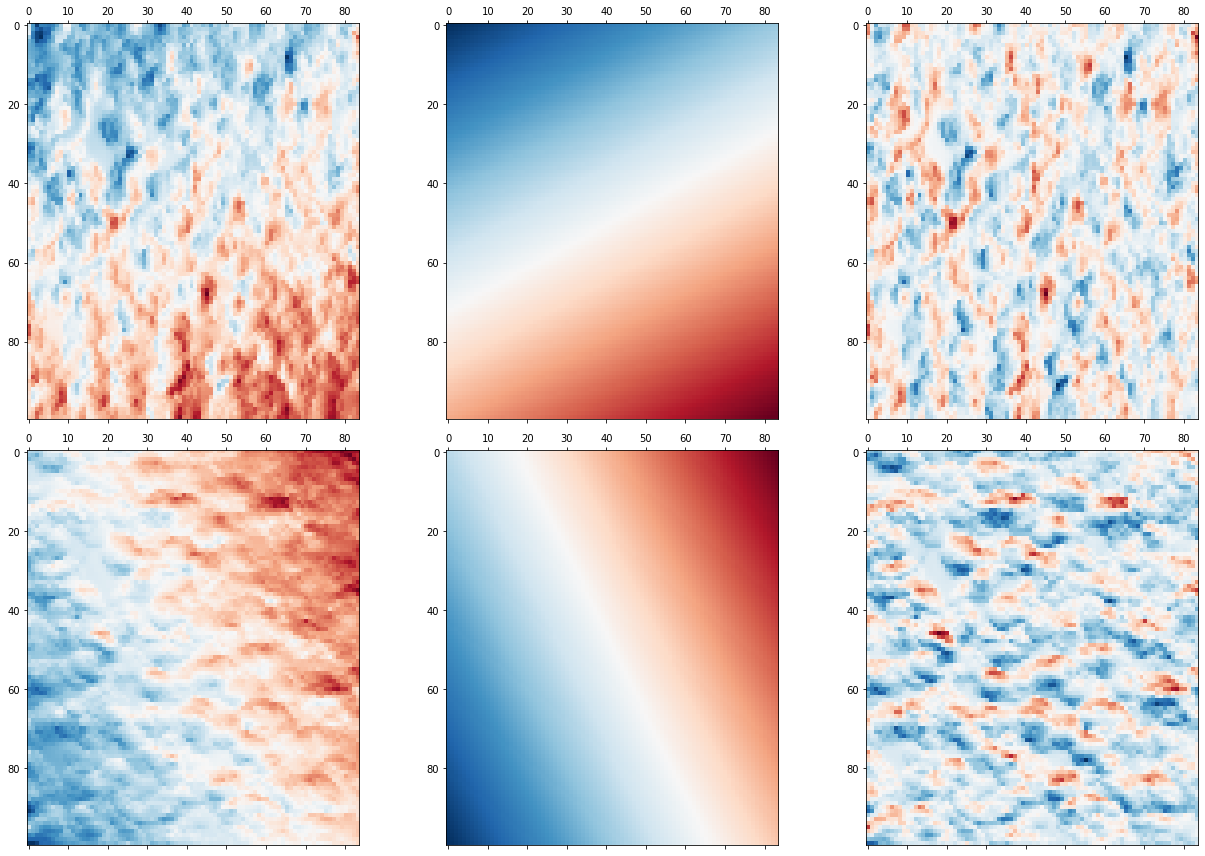

In [222]:
# Fit the diffraction shifts wuth robust fitting

fit_function = py4DSTEM.process.fit.plane        # Select fit type
#fit_function = py4DSTEM.process.fit.parabola

# Fit
popt_x, pcov_x, xshifts_cal_fit = py4DSTEM.process.fit.fit_2D(fit_function, xshifts_cal_meas, robust=True)
popt_y, pcov_y, yshifts_cal_fit = py4DSTEM.process.fit.fit_2D(fit_function, yshifts_cal_meas, robust=True)
residuals_x = xshifts_cal_meas-xshifts_cal_fit
residuals_y = yshifts_cal_meas-yshifts_cal_fit

imgrid = [xshifts_cal_meas,xshifts_cal_fit,residuals_x,yshifts_cal_meas,yshifts_cal_fit,residuals_y]
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:imgrid[i],H=2,W=3,contrast='minmax',cmap='RdBu')

In [223]:
# Apply shifts
braggpeaks_cal_shiftcorr = py4DSTEM.process.calibration.shift_braggpeaks(
                                braggpeaks_cal_raw, xshifts_cal_fit, yshifts_cal_fit)

100%|████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:02<00:00, 3260.32it/s]


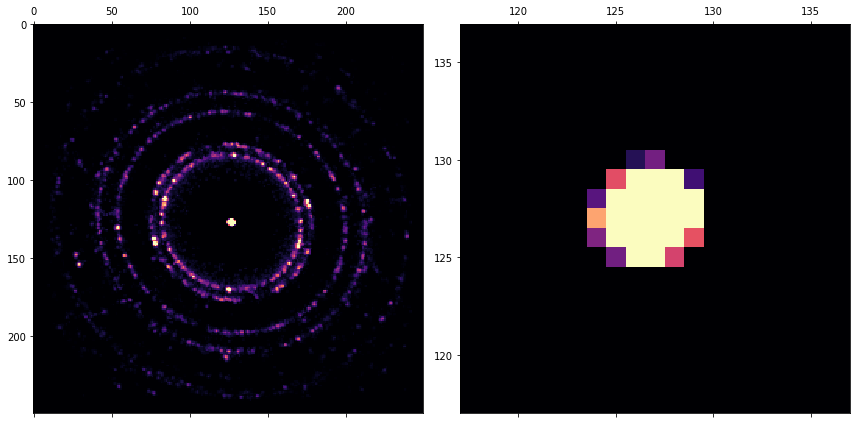

In [198]:
# Re-calculate Bragg vector map
bvm_cal_shiftcorr = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                    braggpeaks_cal_shiftcorr,datacube_cal.Q_Nx,datacube_cal.Q_Ny)

from scipy.ndimage.filters import gaussian_filter
qx0,qy0 = np.unravel_index(np.argmax(gaussian_filter(bvm_cal_shiftcorr,4)),
                           (datacube_cal.Q_Nx,datacube_cal.Q_Ny))
fig,axs=py4DSTEM.visualize.show_image_grid(get_ar=lambda i:bvm_cal_shiftcorr,H=1,W=2,
                                           returnfig=True,cmap='magma',min=0,max=4,power=0.5)
axs[0,1].set_xlim(qx0-zoomin_rad,qx0+zoomin_rad)
axs[0,1].set_ylim(qy0-zoomin_rad,qy0+zoomin_rad)
plt.show()

#### Elliptical distortion correction

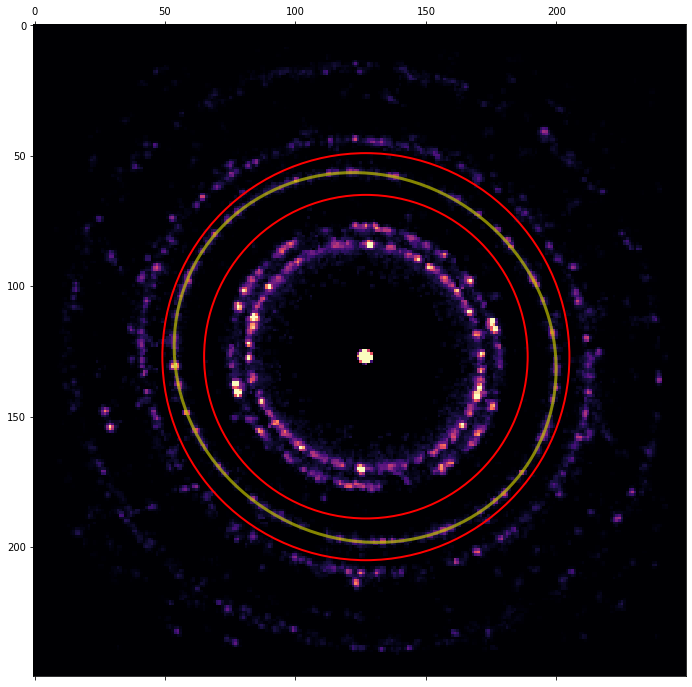

Measured ellipticity = 7.196387777664648%
Measured theta = -31.167605107789427 degrees


In [199]:
# Measure elliptical distortions
qmin,qmax = 62,78  # pick a ring

ellipseparams_cal_shiftcorr,_ = py4DSTEM.process.calibration.measure_elliptical_distortion(
                                bvm_cal_shiftcorr,qx0,qy0,qmin,qmax)
x,y,a,b,theta = ellipseparams_cal_shiftcorr

from matplotlib.patches import Ellipse
fig,ax = py4DSTEM.visualize.show_circ(bvm_cal_shiftcorr,0,4,power=0.5,cmap='magma',
                             center=[(qx0,qy0),(qx0,qy0)],R=[qmin,qmax],fill=False,returnfig=True)
ellipse = Ellipse((y,x),2*a,2*b,90-np.degrees(theta), fill=False,edgecolor='y',linestyle="-",linewidth=3, alpha=.7)
ax.add_patch(ellipse)
plt.show()

print("Measured ellipticity = {}%".format(100*(max(a,b)/min(a,b)-1)))
print("Measured theta = {} degrees".format(np.degrees(theta)))

100%|████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:02<00:00, 3277.13it/s]


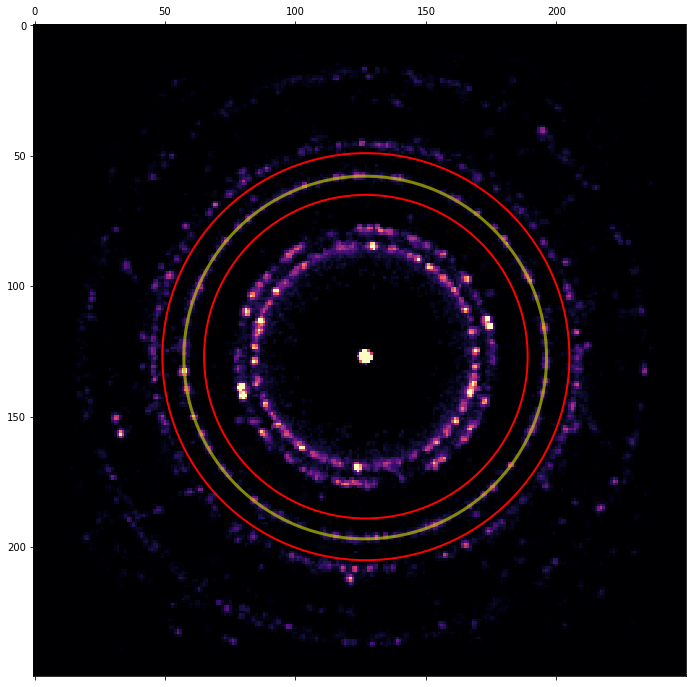

Measured ellipticity = 0.005786538664231955%
Measured theta = 23.140780514737287 degrees


In [200]:
# Perform distortion correction
braggpeaks_cal_ellipsecorr = py4DSTEM.process.calibration.correct_elliptical_distortion(
                                            braggpeaks_cal_shiftcorr, ellipseparams_cal_shiftcorr)

# Recalculate the bvm
bvm_cal_ellipsecorr = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                            braggpeaks_cal_ellipsecorr,datacube_cal.Q_Nx,datacube_cal.Q_Ny)

# Re-measure elliptical distortions
ellipseparams_cal_ellipsecorr,_ = py4DSTEM.process.calibration.measure_elliptical_distortion(
                        bvm_cal_ellipsecorr,qx0,qy0,qmin,qmax)
x,y,a,b,theta = ellipseparams_cal_ellipsecorr

fig,ax = py4DSTEM.visualize.show_circ(bvm_cal_ellipsecorr,0,4,power=0.5,cmap='magma',
                             center=[(qx0,qy0),(qx0,qy0)],R=[qmin,qmax],fill=False,returnfig=True)
ellipse = Ellipse((y,x),2*a,2*b,90-np.degrees(theta), fill=False,edgecolor='y',linestyle="-",linewidth=3, alpha=.7)
ax.add_patch(ellipse)
plt.show()
print("Measured ellipticity = {}%".format(100*(max(a,b)/min(a,b)-1)))
print("Measured theta = {} degrees".format(np.degrees(theta)))

#### Pixel size calibration

Here we calibrate the diffraction space pixel size; no calibration of the real space pixel size, i.e. the scan step size, is performed.

Note that strictly, what we're calibrating here is the pixel size of the *elliptically corrected data*.  The end result, a number with units of inverse distance, is only accurate for data to which the elliptical corrections calculated above have already been applied.  If we consider objects already generated in this notebook, then, this pixel calibration may be correctly applied to `bvm_cal_ellipsecorr`, but should be considered approximate if applied to `bvm_cal_shiftcorr`.

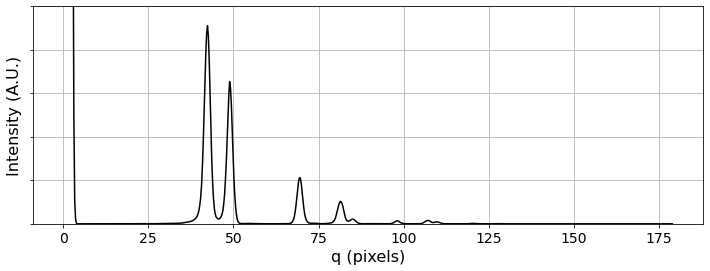

In [201]:
# Radial integration
ymax = 50000
dq=0.25             # i.e. binsize for the x-axis

x,y,_,_,_ = ellipseparams_cal_ellipsecorr
q,radialintensity_cal = py4DSTEM.process.utils.radial_integral(bvm_cal_ellipsecorr,x,y,dr=dq)
py4DSTEM.visualize.show_qprofile(q=q,intensity=radialintensity_cal,ymax=ymax)

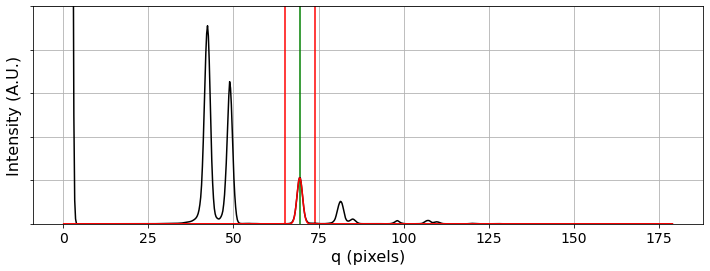

In [202]:
# Fit a gaussian to find a peak location
qmin,qmax = 65,74
A,mu,sigma = py4DSTEM.process.fit.fit_1D_gaussian(q,radialintensity_cal,qmin,qmax)

fig,ax = py4DSTEM.visualize.show_qprofile(q=q,intensity=radialintensity_cal,ymax=ymax,
                                          returnfig=True)
ax.vlines((qmin,qmax),0,ax.get_ylim()[1],color='r')
ax.vlines(mu,0,ax.get_ylim()[1],color='g')
ax.plot(q,py4DSTEM.process.fit.gaussian(q,A,mu,sigma),color='r')
plt.show()

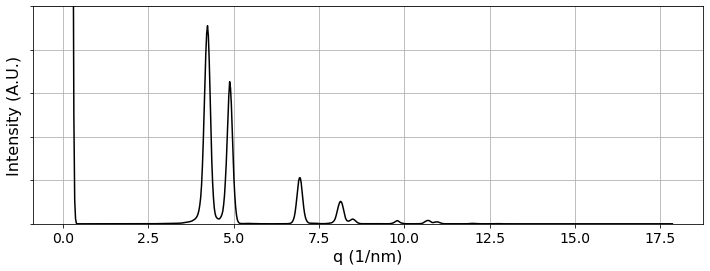

In [203]:
# Get pixel calibration
# At time of writing, one peak with a known spacing
# must be manually identified and entered
d_spacing_nm = 0.1442                           # This is the Au 022 peak
inv_nm_per_pixel = 1./(d_spacing_nm * mu)
py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_cal,
                                 ymax=ymax,xlabel='q (1/nm)')

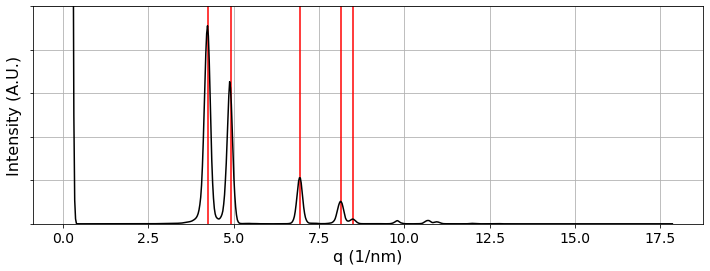

In [204]:
# Demonstrate consistency with known Au spacings
# TODO: fit all peaks simultaneously
spacings_nm = np.array([0.1177,0.123,0.1442,0.2039,0.2355])   # 222, 113, 022, 002, 111
spacings_inv_nm = 1./spacings_nm

fig,ax = py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_cal,
                                 ymax=ymax,xlabel='q (1/nm)',returnfig=True)
ax.vlines(spacings_inv_nm,0,ax.get_ylim()[1],color='r')
plt.show()

### Save calibration measurements

In [206]:
braggpeaks_cal_raw.name = 'braggpeaks_cal_raw'
braggpeaks_cal_shiftcorr.name = 'braggpeaks_cal_shiftcorr'
braggpeaks_cal_ellipsecorr.name = 'braggpeaks_cal_ellipsecorr'
centerposition_cal_meas = py4DSTEM.io.DiffractionSlice(
                          data = np.dstack([xshifts_cal_meas,yshifts_cal_meas]),
                          name = 'centerposition_cal_meas',
                          slicelabels = ('qx','qy')
)
centerposition_cal_fit = py4DSTEM.io.DiffractionSlice(
                          data = np.dstack([xshifts_cal_fit,yshifts_cal_fit]),
                          name = 'centerposition_cal_fit',
                          slicelabels = ('qx','qy')
)

# Save data
data = [braggpeaks_cal_raw,braggpeaks_cal_shiftcorr,braggpeaks_cal_ellipsecorr,
        centerposition_cal_meas,centerposition_cal_fit]
py4DSTEM.io.append(filepath,data)

# Save metadata
metadata = py4DSTEM.io.read(filepath,metadata=True)
metadata.set_Q_pixel_size(inv_nm_per_pixel)
metadata.set_Q_pixel_size_units('1/nm')
_,_,a,b,theta = ellipseparams_cal_shiftcorr
a,b = a/np.mean((a,b)),b/np.mean((a,b)) # Normalize elliptical semi-axes
                                        # TODO: audit this. Should we do differently?
metadata.set_elliptical_distortions(a,b,theta)
py4DSTEM.io.append(filepath,metadata)

KeyError: "Unable to open object (object 'counted_datacubes' doesn't exist)"

### Apply calibrations

Next we calibrate the dataset of interest.  First we measure and correct the diffraction shifts in this dataset, then we apply the elliptical distortions and pixel sizes measured from the calibration dataset.

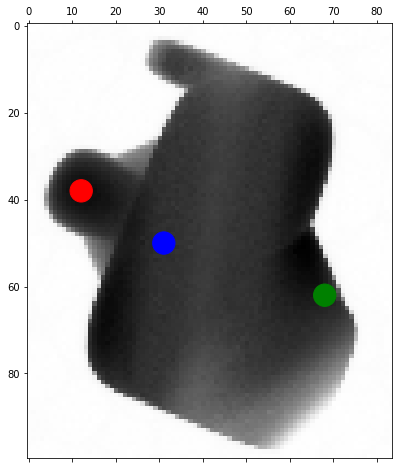

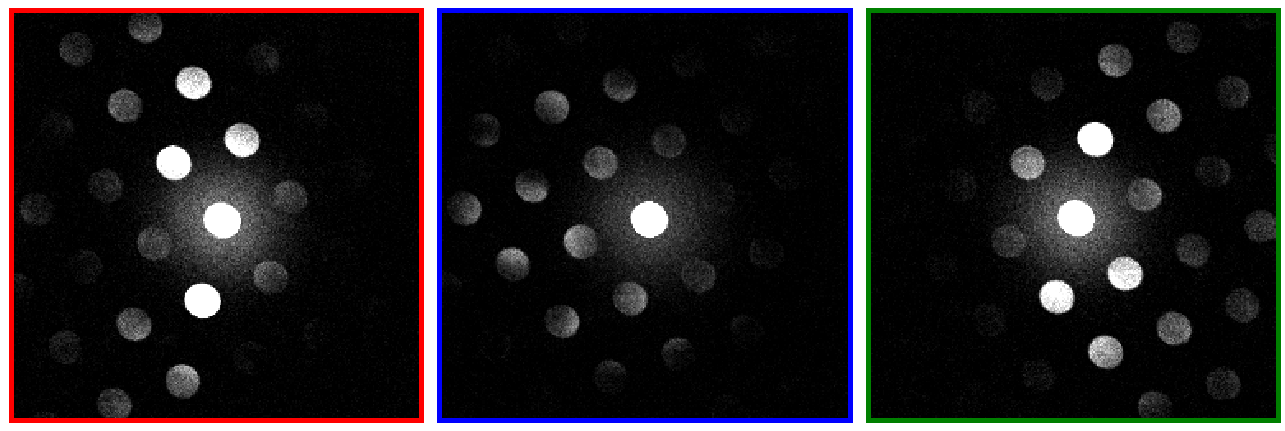

In [207]:
# Select a few DPs on which to test disk detection parameters

rxs_sim = 38,50,62
rys_sim = 12,31,68
colors = 'r','b','g'

py4DSTEM.visualize.show_points(BF_sim,x=rxs_sim,y=rys_sim,point_color=colors,contrast='minmax',figsize=(8,8))
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:datacube_sim.data[rxs_sim[i],rys_sim[i],:,:],
                                   H=1,W=3,get_bc=lambda i:colors[i])

Analyzed 3 diffraction patterns in 0h 0m 0s


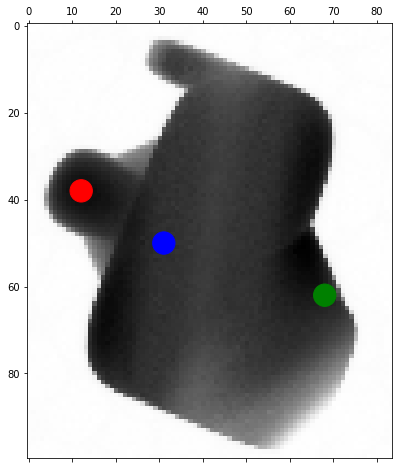

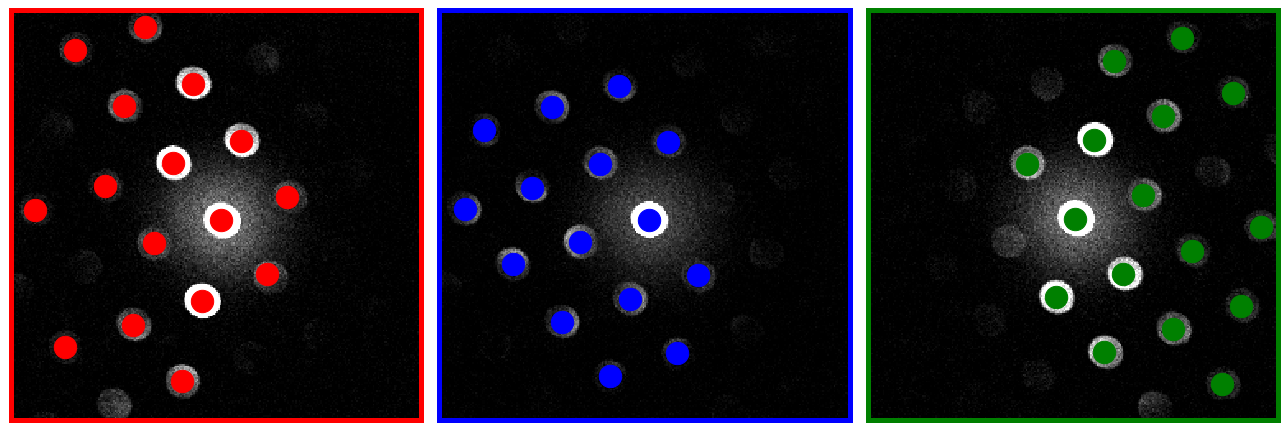

In [208]:
# Tune disk detection parameters on selected DPs

corrPower=1
sigma=1
edgeBoundary=10
minRelativeIntensity=0.00005
relativeToPeak=1
minPeakSpacing=10
maxNumPeaks=80
subpixel='multicorr'
upsample_factor=16

selected_peaks = py4DSTEM.process.diskdetection.find_Bragg_disks_selected(
                        datacube=datacube_sim,
                        probe=probe_kernel,
                        Rx=rxs_sim,
                        Ry=rys_sim,
                        corrPower=corrPower,
                        sigma=sigma,
                        edgeBoundary=edgeBoundary,
                        minRelativeIntensity=minRelativeIntensity,
                        relativeToPeak=relativeToPeak,
                        minPeakSpacing=minPeakSpacing,
                        maxNumPeaks=maxNumPeaks,
                        subpixel=subpixel,
                        upsample_factor=upsample_factor
)

py4DSTEM.visualize.show_points(BF_sim,x=rxs_sim,y=rys_sim,point_color=colors,contrast='minmax',figsize=(8,8))
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:datacube_sim.data[rxs_sim[i],rys_sim[i],:,:],
                                   H=1,W=3,get_bc=lambda i:colors[i],
                                   get_x=lambda i:selected_peaks[i].data['qx'],
                                   get_y=lambda i:selected_peaks[i].data['qy'],
                                   get_pointcolors=lambda i:colors[i])

In [209]:
# Get all disks

braggpeaks_sim_raw = py4DSTEM.process.diskdetection.find_Bragg_disks(
                                datacube=datacube_sim,
                                probe=probe_kernel,
                                corrPower=corrPower,
                                sigma=sigma,
                                edgeBoundary=edgeBoundary,
                                minRelativeIntensity=minRelativeIntensity,
                                relativeToPeak=relativeToPeak,
                                minPeakSpacing=minPeakSpacing,
                                maxNumPeaks=maxNumPeaks,
                                subpixel=subpixel,
                                upsample_factor=upsample_factor
)

Finding Bragg Disks: 100%|████████████████████████████████████████████████████████| 8.40k/8.40k [03:06<00:00, 44.9DP/s]

Analyzed 8400 diffraction patterns in 0h 3m 6s


In [ ]:
# Get Bragg vector map

bvm_sim_raw = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                    braggpeaks_sim_raw,datacube_sim.Q_Nx,datacube_sim.Q_Ny)
py4DSTEM.visualize.show(bvm_sim_raw,0,5,cmap='magma',power=0.5)

#### Diffraction shift correction

In [ ]:
# Get center position

findcenter = 'CoM'   # Must be 'CoM' or 'max'
zoomin_rad = 10

xshifts_sim_meas, yshifts_sim_meas, bvm_center_sim = py4DSTEM.process.calibration.get_diffraction_shifts(
            braggpeaks_sim_raw,datacube_sim.Q_Nx,datacube_sim.Q_Ny,findcenter=findcenter)

# Show
qx0,qy0 = py4DSTEM.process.utils.get_CoM(bvm_center_sim)
fig,axs=py4DSTEM.visualize.show_image_grid(get_ar=lambda i:bvm_center_sim,H=1,W=2,returnfig=True,cmap='magma',contrast='minmax')
axs[0,1].set_xlim(qx0-zoomin_rad,qx0+zoomin_rad)
axs[0,1].set_ylim(qy0-zoomin_rad,qy0+zoomin_rad)
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:[xshifts_sim_meas,yshifts_sim_meas][i],H=1,W=2,cmap='RdBu',contrast='minmax')

In [ ]:
# Find outliers

n_sigma = 10
edge_boundary = 1
n_bins = 100

mask,n,bins,cutoff = py4DSTEM.process.calibration.find_outlier_shifts(xshifts_sim_meas,yshifts_sim_meas,n_sigma=n_sigma,edge_boundary=edge_boundary,n_bins=n_bins)

# Show
xshifts_masked = np.ma.masked_array(xshifts_sim_meas, mask)
yshifts_masked = np.ma.masked_array(yshifts_sim_meas, mask)
mask_display = np.ma.masked_array(mask, mask==False)

fig,ax = plt.subplots()
ax.bar(bins[:-1]+(bins[1]-bins[0])/2., n, (bins[1]-bins[0]), align='center')
ax.vlines(cutoff,0,ax.get_ylim()[1],linestyle=':')
plt.show()

fig,axs = py4DSTEM.visualize.show_image_grid(get_ar=lambda i:[xshifts_masked,yshifts_masked][i],
                                             H=1,W=2,returnfig=True,cmap="RdBu",contrast='minmax')
axs[0,0].matshow(mask_display)
axs[0,1].matshow(mask_display)
plt.show()

In [ ]:
# Fit the diffraction shifts

fit_function = py4DSTEM.process.fit.plane        # Select fit type
#fit_function = py4DSTEM.process.fit.parabola

# Fit
popt_x, pcov_x, xshifts_sim_fit = py4DSTEM.process.fit.fit_2D(fit_function, xshifts_sim_meas, data_mask=mask==False)
popt_y, pcov_y, yshifts_sim_fit = py4DSTEM.process.fit.fit_2D(fit_function, yshifts_sim_meas, data_mask=mask==False)
residuals_x = xshifts_sim_meas-xshifts_sim_fit
residuals_y = yshifts_sim_meas-yshifts_sim_fit
residuals_x[mask] = 0
residuals_y[mask] = 0

imgrid = [xshifts_sim_meas,xshifts_sim_fit,residuals_x,yshifts_sim_meas,yshifts_sim_fit,residuals_y]
py4DSTEM.visualize.show_image_grid(get_ar=lambda i:imgrid[i],H=2,W=3,contrast='minmax',cmap='RdBu')

In [ ]:
# Apply shifts
braggpeaks_sim_shiftcorr = py4DSTEM.process.calibration.shift_braggpeaks(
                           braggpeaks_sim_raw, xshifts_sim_fit, yshifts_sim_fit)

In [ ]:
# Re-calculate Bragg vector map
bvm_sim_shiftcorr = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                    braggpeaks_sim_shiftcorr,datacube_sim.Q_Nx,datacube_sim.Q_Ny)

from scipy.ndimage.filters import gaussian_filter
qx0,qy0 = np.unravel_index(np.argmax(gaussian_filter(bvm_sim_shiftcorr,4)),
                           (datacube_sim.Q_Nx,datacube_sim.Q_Ny))
fig,axs=py4DSTEM.visualize.show_image_grid(get_ar=lambda i:bvm_sim_shiftcorr,H=1,W=2,
                                           returnfig=True,cmap='magma',min=0,max=16,power=0.5)
axs[0,1].set_xlim(qx0-zoomin_rad,qx0+zoomin_rad)
axs[0,1].set_ylim(qy0-zoomin_rad,qy0+zoomin_rad)
plt.show()

#### Elliptical distortion correction

In [ ]:
# Get ellipse params
x,y = py4DSTEM.process.utils.get_CoM(bvm_center_sim) # center position
metadata = py4DSTEM.io.read(filepath,metadata=True)  # ellipse params
a,b,theta = metadata.get_elliptical_distortions()
ellipseparams_sim = x,y,a,b,theta                    # package params

# Perform distortion correction
braggpeaks_sim_ellipsecorr = py4DSTEM.process.calibration.correct_elliptical_distortion(
                             braggpeaks_sim_shiftcorr, ellipseparams_sim)

# Recalculate the bvm
bvm_sim_ellipsecorr = py4DSTEM.process.diskdetection.get_bragg_vector_map(
                      braggpeaks_sim_ellipsecorr,datacube_sim.Q_Nx,datacube_sim.Q_Ny)

# Show
py4DSTEM.visualize.show(bvm_sim_ellipsecorr,0,4,power=0.5,cmap='magma')

#### Pixel size calibration

In [ ]:
# Radial integration
ymax = 75000
dq=0.25             # i.e. binsize for the x-axis
q,radialintensity_sim = py4DSTEM.process.utils.radial_integral(bvm_sim_ellipsecorr,x,y,dr=dq)
py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_sim,ymax=ymax,xlabel='q (1/nm)')

In [ ]:
# Confirm correct alignment of known Au peaks
fig,ax = py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_sim,
                                 ymax=ymax,xlabel='q (1/nm)',returnfig=True)
ax.vlines(spacings_inv_nm,0,ax.get_ylim()[1],color='r')
plt.show()

In [ ]:
# Note that radial integration of the raw or shift-corrected-only
# bvms give incorrect results!
q,radialintensity_sim_raw = py4DSTEM.process.utils.radial_integral(bvm_sim_raw,x,y,dr=dq)
q,radialintensity_sim_shiftcorr = py4DSTEM.process.utils.radial_integral(bvm_sim_shiftcorr,x,y,dr=dq)

# Show
f1,a1 = py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_sim,ymax=ymax,xlabel='q (1/nm)',returnfig=True)
f2,a2 = py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_sim_shiftcorr,ymax=ymax,xlabel='q (1/nm)',returnfig=True)
f3,a3 = py4DSTEM.visualize.show_qprofile(q=q*inv_nm_per_pixel,intensity=radialintensity_sim_raw,ymax=ymax,xlabel='q (1/nm)',returnfig=True)
f1.suptitle('Ellipse corrected',size=22)
f2.suptitle('Shift corrected only',size=22)
f3.suptitle('Raw',size=22)
for a,f,t in zip([a1,a2,a3],[f1,f2,f3],
                 ['Ellipse corrected','Shift corrected only','Raw']):
    f.suptitle(t,size=22)
    a.vlines(spacings_inv_nm,0,a.get_ylim()[1],color='r',alpha=0.5)

### Save

In [ ]:
braggpeaks_sim_raw.name = 'braggpeaks_sim_raw'
braggpeaks_sim_shiftcorr.name = 'braggpeaks_sim_shiftcorr'
braggpeaks_sim_ellipsecorr.name = 'braggpeaks_sim_ellipsecorr'
centerposition_sim_meas = py4DSTEM.io.DiffractionSlice(
                          data = np.dstack([xshifts_sim_meas,yshifts_sim_meas]),
                          name = 'centerposition_sim_meas',
                          slicelabels = ('qx','qy')
)
centerposition_sim_fit = py4DSTEM.io.DiffractionSlice(
                          data = np.dstack([xshifts_sim_fit,yshifts_sim_fit]),
                          name = 'centerposition_sim_fit',
                          slicelabels = ('qx','qy')
)

# Save data
data = [braggpeaks_sim_raw,braggpeaks_sim_shiftcorr,braggpeaks_sim_ellipsecorr,
        centerposition_sim_meas,centerposition_sim_fit]
py4DSTEM.io.append(filepath,data)

### Rotational calibration

Here we determine the rotational offset of the real and diffraction space coordinates.  We do so by comparing two images of the sample, one in the image plane and one in the diffraction plane.  The latter image is a 'shadow image' formed in a defocused CBED pattern.  The former image can be any STEM image (BF, HAADF, etc) with a sufficiently wide field of view to match it to the defocused CBED.  A sample with clear features is also necessary.

In [ ]:
# Show the data
py4DSTEM.visualize.show(defocused_probe,figsize=(6,6))
py4DSTEM.visualize.show(BF_sim,figsize=(6,6),contrast='minmax')

In [ ]:
# Pick two fiducial points, locate them on each image
cbed_p1 = (154,204)
cbed_p2 = (212,401)
stem_p1 = (59,16.5)
stem_p2 = (15,37)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.matshow(defocused_probe,cmap='gray')
ax2.matshow(BF_sim,cmap='gray')
ax1.plot((cbed_p1[1],cbed_p2[1]),(cbed_p1[0],cbed_p2[0]),color='y')
ax1.scatter((cbed_p1[1],cbed_p2[1]),(cbed_p1[0],cbed_p2[0]),color=('r','b'))
ax2.plot((stem_p1[1],stem_p2[1]),(stem_p1[0],stem_p2[0]),color='y')
ax2.scatter((stem_p1[1],stem_p2[1]),(stem_p1[0],stem_p2[0]),color=('r','b'))
ax1.grid(True)
ax2.grid(True)
plt.show()

In [ ]:
# Measure the rotational offset
stem_angle = np.angle(stem_p2[0]+1j*stem_p2[1] - stem_p1[0]-1j*stem_p1[1], deg=True)%360
cbed_angle = np.angle(cbed_p2[0]+1j*cbed_p2[1] - cbed_p1[0]-1j*cbed_p1[1], deg=True)%360
QR_rotation = stem_angle-cbed_angle
print("Real space is rotated {} degrees counterclockwise with respect to diffraction space.".format(QR_rotation))

#### Save

In [ ]:
# Save metadata
metadata = py4DSTEM.io.read(filepath,metadata=True)
metadata.set_QR_rotation(QR_rotation)
metadata.set_QR_rotation_units('degrees')
py4DSTEM.io.append(filepath,metadata)